<a href="https://colab.research.google.com/github/shane-harris/Stock_Price_Predictor/blob/master/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as ply
import pandas_datareader as pdr
% matplotlib inline
import datetime

import json
import csv
import io
import requests
import os
import collections
import random
import time

# import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.feature_extraction.text as sk_text

from sklearn import metrics
from sklearn import preprocessing 
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import glob

path = '/content/drive/My Drive/CSC 180/Final Project/Stock Data/Final Dataset'
filenames = glob.glob(path + "/*.csv")

In [4]:
filenames[0]

'/content/drive/My Drive/CSC 180/Final Project/Stock Data/Final Dataset/CTRN_final.csv'

In [5]:
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [6]:
dfs[0].shape

(300, 1030)

In [7]:
APPL = dfs[0]
apple_time = dfs[0].time_x
apple_close = dfs[0].close_x
APPL['time_x'] = pd.to_datetime(APPL.time_x,format='%Y-%m-%d')
APPL.index = APPL['time_x']
# APPL

In [8]:
# APPL.drop('Stock Symbol', axis=1, inplace=True)

In [9]:
all_stocks = pd.concat(dfs)
all_stocks.reset_index(inplace=True,drop=True)
all_stocks['time_x'] = pd.to_datetime(all_stocks.time_x,format='%Y-%m-%d')
all_stocks.index = all_stocks['time_x']

In [10]:
print(all_stocks)

            Unnamed: 0 Stock Symbol     time_x  ...  your.1  youtube  zuckerberg.1
time_x                                          ...                               
2018-09-13           0         CTRN 2018-09-13  ...     0.0      0.0           0.0
2018-09-14           1         CTRN 2018-09-14  ...     0.0      0.0           0.0
2018-09-17           2         CTRN 2018-09-17  ...     0.0      0.0           0.0
2018-09-18           3         CTRN 2018-09-18  ...     0.0      0.0           0.0
2018-09-19           4         CTRN 2018-09-19  ...     0.0      0.0           0.0
...                ...          ...        ...  ...     ...      ...           ...
2019-11-14         295           UA 2019-11-14  ...     0.0      0.0           0.0
2019-11-15         296           UA 2019-11-15  ...     0.0      0.0           0.0
2019-11-18         297           UA 2019-11-18  ...     0.0      0.0           0.0
2019-11-19         298           UA 2019-11-19  ...     0.0      0.0           0.0
2019

In [11]:
all_stocks.reset_index(inplace=True,drop=True)

In [12]:
all_stocks.head(200)

,Unnamed: 0,Stock Symbol,time_x,close_x,0,1,2,3,4,5,6,7,8,9,10_x,11_x,12,sentiment_Positive_x,sentiment_Negative_x,sentiment_Neutral_x,Unnamed: 0_y,index,date,Ticker,Unnamed: 0.1,Ticker.1,date.1,sentiment_Negative_y,sentiment_Neutral_y,sentiment_Positive_y,000,10_y,11_y,20,2018,2019,2020,30,500,about,...,value.1,vehicles.1,viacom.1,video.1,vs.1,wall.1,walmart.1,wants,war.1,warren,wars,was.1,watch.1,water.1,waymo,we.1,wednesday.1,week.1,western.1,what.1,where.1,which.1,who.1,wholesale,why.1,will.1,win,winners,with.1,won,world.1,worth.1,wu.1,xbox,year.1,years.1,you.1,your.1,youtube,zuckerberg.1
0,0,CTRN,2018-09-13,30.26,1.000000,0.988145,0.993433,0.115122,0.562703,0.005115,0.365604,0.318901,0.463417,0.988266,0.988888,0.000000,1.0000,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,CTRN,2018-09-14,29.48,0.982921,0.970954,0.956418,0.057813,0.567473,0.026805,0.332001,0.296064,0.407270,0.940096,0.943272,0.000000,1.0000,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,CTRN,2018-09-17,30.21,0.933451,0.993776,0.956418,0.190523,0.588508,0.006472,0.332001,0.296064,0.407270,0.985178,0.985964,0.000000,1.0000,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,CTRN,2018-09-18,30.41,0.979976,0.976289,0.989851,0.152550,0.570666,0.001072,0.355412,0.303906,0.463279,0.997530,0.997661,0.000000,1.0000,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,CTRN,2018-09-19,30.45,0.992344,1.000000,1.000000,0.102185,0.529311,0.000000,0.361428,0.309573,0.470028,1.000000,1.000000,0.000000,1.0000,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,CTRN,2019-06-25,14.31,0.067138,0.048607,0.051940,0.211228,0.629419,0.918841,0.918395,0.879585,0.999673,0.041223,0.036555,0.975449,0.2318,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,196,CTRN,2019-06-26,14.80,0.042403,0.060166,0.053134,0.131660,0.597212,0.861448,1.000000,1.000000,1.000000,0.072784,0.064542,0.975449,0.2318,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,197,CTRN,2019-06-27,14.71,0.077150,0.065797,0.072836,0.159914,0.583180,0.871703,0.824331,0.818424,0.836701,0.066987,0.059401,0.975449,0.2318,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [13]:
stock_close = all_stocks['close_x']
# del all_stocks['close_x']
all_stocks = pd.concat([all_stocks, stock_close], axis=1)

In [14]:
all_stocks.to_csv(r'/content/drive/My Drive/CSC 180/Final Project/Stock Data/Processed Data/all_stock.csv')

In [15]:
stock_symbol = all_stocks['Stock Symbol']
stock_time = all_stocks['time_x']

stock_close_and_time = pd.concat([stock_time, stock_close], axis=1)
stock_close_and_time.reset_index(inplace=True, drop=True)

In [16]:
# Each Stock needs to be normalized individually and then appended together 
stocks = []

min_max_scaler = preprocessing.MinMaxScaler()

dfs1 = dfs

for df in dfs1:
  # del df['Stock Symbol']
  # del df['time_x']
  # del df['close_x']
  # df = min_max_scaler.fit_transform(df)
  # df = pd.DataFrame(df)
  df.reset_index(inplace=True, drop=True)
  stocks.append(df)
# stocks = pd.DataFrame(stocks)
# stocks = pd.concat(stocks)
stocks = pd.concat(stocks)
stocks.reset_index(inplace=True,drop=True)



In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
stocks

,Unnamed: 0,Stock Symbol,time_x,close_x,0,1,2,3,4,5,6,7,8,9,10_x,11_x,12,sentiment_Positive_x,sentiment_Negative_x,sentiment_Neutral_x,Unnamed: 0_y,index,date,Ticker,Unnamed: 0.1,Ticker.1,date.1,sentiment_Negative_y,sentiment_Neutral_y,sentiment_Positive_y,000,10_y,11_y,20,2018,2019,2020,30,500,about,access,according,adami,aegion,aegn,after,against,ago,ahead,all,alley,ally,alphabet,also,amazon,american,amid,an,analyst,analysts,and,announced,another,antitrust,app,appeared,apple,are,armour,around,as,at,auto,average,back,based,be,beat,been,before,being,bell,best,better,between,big,biggest,billion,block,bloomberg,board,bob,both,box,brian,bullish,business,but,buy,buying,by,cabot,california,call,can,capital,car,cars,cash,cbs,ceo,chain,chairman,change,chief,china,chipotle,close_y,closed,closing,cloud,clues,cmg,cnbc,co,com,combination,come,coming,companies,company,competition,concerns,consider,consumer,consumers,content,continue,continues,corp,corporation,cost,costco,could,coupa,court,cramer,customers,dan,data,day,days,deal,delivered,demand,department,despite,digital,director,discuss,discusses,dish,disney,dividend,do,doesn,dow,down,driving,due,during,earnings,economy,electric,elon,employees,end,ended,energy,estimates,even,executive,expectations,expected,facebook,fast,federal,few,final,finance,financial,find,first,fiscal,five,focus,following,food,for,former,founder,free,friday,from,future,game,gas,general,get,giant,giants,give,global,globe,good,google,government,great,grill,group,growing,growth,guy,had,half,halftime,has,have,he,health,help,here,hershey,high,higher,highs,his,hit,hold,how,if,illumina,ilmn,impressive,in,inc,including,industry,ingredients,insider,...,libra,like.1,likely.1,list,logistics,long.1,look.1,looks.1,low,make.1,makes,making.1,mark.1,market.1,markets.1,may.1,mcd.1,mcdonald.1,media.1,merger.1,mexican.1,microsoft.1,might.1,million.1,mixed,mobile.1,model.1,momentum.1,money.1,more.1,most.1,move.1,moves.1,msft.1,much.1,musk.1,must,natural,need.1,netflix.1,network.1,new.1,news.1,next.1,no.1,not.1,now.1,oceanfirst,ocfc,of.1,off.1,office,oil.1,on.1,one.1,online.1,open,option.1,options.1,or.1,oracle.1,orcl.1,other.1,out.1,outlook.1,over.1,own.1,part,partners.1,partnership,pay.1,pcg.1,people.1,pg.1,pick,picks.1,pinnacle,piper,plan.1,plans.1,pnfp,political,portfolio.1,potential.1,power.1,president.1,preview,price.1,prices,privacy.1,pro,probe,production.1,push,q1.1,q2.1,q3.1,q4,quarter.1,rally,ranked,rate,reasons,rebound,recession,record.1,report.1,reportedly,reports.1,resources.1,restaurant,results.1,retail.1,retailers.1,revenue.1,revenues,right.1,rise,risk,run.1,sales.1,say,says.1,season.1,sec,second.1,sector.1,see.1,sees,self,sell.1,september.1,service.1,services.1,set.1,share.1,shares.1,shopping,short,should.1,show,shows,since.1,so.1,social.1,software.1,solar,sold.1,solid.1,some.1,stanley,steve.1,still.1,stock.1,stocks.1,store.1,stores.1,strategy,streaming.1,street.1,strong.1,take.1,takes.1,talks.1,target.1,tariffs.1,tax,tech.1,technology.1,telus.1,term.1,tesla.1,tgt,than.1,that.1,the.1,their.1,there.1,these.1,they.1,things,this.1,three.1,through.1,thursday.1,tim.1,time.1,to.1,today.1,too.1,top.1,toyota.1,trade.1,traders.1,trades.1,transcript.1,trump.1,tu,tuesday.1,tv.1,twitter,two.1,under.1,undervalued,union.1,up.1,upside,us.1,users.1,utility.1,value.1,vehicles.1,viacom.1,video.1,vs.1,wall.1,walmart.1,wants,war.1,warren,wars,was.1,watch.1,water.1,waymo,we.1,wednesday.1,week.1,western.1,what.1,where.1,which.1,who.1,wholesale,why.1,will.1,win,winners,with.1,won,world.1,worth.1,wu.1,xbox,year.1,years.1,you.1,your.1,youtube,zuckerberg.1
0,0,CTRN,2018-09-13 00:00:00,30.26,1.000000,0.988145,0.993433,0.115122,0.562703,0.005115,0.365604,0.318901,0.463417,0.988266,0.988888,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0

In [18]:
pd.DataFrame(stocks)

stock_symbol_one_hot = pd.get_dummies(all_stocks['Stock Symbol'])

stock_symbols_onehot_and_data = pd.concat([stock_symbol_one_hot, stocks], axis=1)

stock_symbols_onehot_and_data.reset_index(inplace=True,drop=True)


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
stock_symbols_onehot_and_data

,AAPL,AEGN,BBY,CASI,CBS,CFMS,CMG,COG,COST,COUP,CTRN,CWT,CXO,DISH,DKL,ECPG,ERIE,FB,FVE,GOOG,HRB,HSY,ILMN,LBRT,LNT,MCD,MIXT,MSFT,NFLX,OCFC,ORCL,PCG,PJC,PNFP,RESI,TM,TSLA,TU,UA,UVV,VOXX,WU,XOM,Unnamed: 0,Stock Symbol,time_x,close_x,0,1,2,3,4,5,6,7,8,9,10_x,11_x,12,sentiment_Positive_x,sentiment_Negative_x,sentiment_Neutral_x,Unnamed: 0_y,index,date,Ticker,Unnamed: 0.1,Ticker.1,date.1,sentiment_Negative_y,sentiment_Neutral_y,sentiment_Positive_y,000,10_y,11_y,20,2018,2019,2020,30,500,about,access,according,adami,aegion,aegn,after,against,ago,ahead,all,alley,ally,alphabet,also,amazon,american,amid,an,analyst,analysts,and,announced,another,antitrust,app,appeared,apple,are,armour,around,as,at,auto,average,back,based,be,beat,been,before,being,bell,best,better,between,big,biggest,billion,block,bloomberg,board,bob,both,box,brian,bullish,business,but,buy,buying,by,cabot,california,call,can,capital,car,cars,cash,cbs,ceo,chain,chairman,change,chief,china,chipotle,close_y,closed,closing,cloud,clues,cmg,cnbc,co,com,combination,come,coming,companies,company,competition,concerns,consider,consumer,consumers,content,continue,continues,corp,corporation,cost,costco,could,coupa,court,cramer,customers,dan,data,day,days,deal,delivered,demand,department,despite,digital,director,discuss,discusses,dish,disney,dividend,do,doesn,dow,down,driving,due,during,earnings,economy,electric,elon,employees,end,ended,energy,estimates,even,executive,expectations,expected,facebook,fast,federal,few,final,finance,financial,find,first,fiscal,five,focus,following,food,for,former,founder,free,friday,from,future,game,gas,...,libra,like.1,likely.1,list,logistics,long.1,look.1,looks.1,low,make.1,makes,making.1,mark.1,market.1,markets.1,may.1,mcd.1,mcdonald.1,media.1,merger.1,mexican.1,microsoft.1,might.1,million.1,mixed,mobile.1,model.1,momentum.1,money.1,more.1,most.1,move.1,moves.1,msft.1,much.1,musk.1,must,natural,need.1,netflix.1,network.1,new.1,news.1,next.1,no.1,not.1,now.1,oceanfirst,ocfc,of.1,off.1,office,oil.1,on.1,one.1,online.1,open,option.1,options.1,or.1,oracle.1,orcl.1,other.1,out.1,outlook.1,over.1,own.1,part,partners.1,partnership,pay.1,pcg.1,people.1,pg.1,pick,picks.1,pinnacle,piper,plan.1,plans.1,pnfp,political,portfolio.1,potential.1,power.1,president.1,preview,price.1,prices,privacy.1,pro,probe,production.1,push,q1.1,q2.1,q3.1,q4,quarter.1,rally,ranked,rate,reasons,rebound,recession,record.1,report.1,reportedly,reports.1,resources.1,restaurant,results.1,retail.1,retailers.1,revenue.1,revenues,right.1,rise,risk,run.1,sales.1,say,says.1,season.1,sec,second.1,sector.1,see.1,sees,self,sell.1,september.1,service.1,services.1,set.1,share.1,shares.1,shopping,short,should.1,show,shows,since.1,so.1,social.1,software.1,solar,sold.1,solid.1,some.1,stanley,steve.1,still.1,stock.1,stocks.1,store.1,stores.1,strategy,streaming.1,street.1,strong.1,take.1,takes.1,talks.1,target.1,tariffs.1,tax,tech.1,technology.1,telus.1,term.1,tesla.1,tgt,than.1,that.1,the.1,their.1,there.1,these.1,they.1,things,this.1,three.1,through.1,thursday.1,tim.1,time.1,to.1,today.1,too.1,top.1,toyota.1,trade.1,traders.1,trades.1,transcript.1,trump.1,tu,tuesday.1,tv.1,twitter,two.1,under.1,undervalued,union.1,up.1,upside,us.1,users.1,utility.1,value.1,vehicles.1,viacom.1,video.1,vs.1,wall.1,walmart.1,wants,war.1,warren,wars,was.1,watch.1,water.1,waymo,we.1,wednesday.1,week.1,western.1,what.1,where.1,which.1,who.1,wholesale,why.1,will.1,win,winners,with.1,won,world.1,worth.1,wu.1,xbox,year.1,years.1,you.1,your.1,youtube,zuckerberg.1
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CTRN,2018-09-13 00:00:00,30.26,1.000000,0.988145,0.993433,0.115122,0.562703,0.005115,0.365604,0.318901,0.463417,0.988266,0.988888,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0

In [19]:
del all_stocks['Stock Symbol']

In [20]:

all_stocks_hot = pd.concat([all_stocks, stock_symbol_one_hot], axis=1)

all_stocks_hot.reset_index(inplace=True,drop=True)

In [21]:
all_stocks_hot['time_x'] = pd.to_datetime(all_stocks_hot.time_x,format='%Y-%m-%d')
all_stocks_hot.index = all_stocks_hot['time_x']

In [22]:
all_stocks_hot

,Unnamed: 0,time_x,close_x,0,1,2,3,4,5,6,7,8,9,10_x,11_x,12,sentiment_Positive_x,sentiment_Negative_x,sentiment_Neutral_x,Unnamed: 0_y,index,date,Ticker,Unnamed: 0.1,Ticker.1,date.1,sentiment_Negative_y,sentiment_Neutral_y,sentiment_Positive_y,000,10_y,11_y,20,2018,2019,2020,30,500,about,access,according,adami,aegion,aegn,after,against,ago,ahead,all,alley,ally,alphabet,also,amazon,american,amid,an,analyst,analysts,and,announced,another,antitrust,app,appeared,apple,are,armour,around,as,at,auto,average,back,based,be,beat,been,before,being,bell,best,better,between,big,biggest,billion,block,bloomberg,board,bob,both,box,brian,bullish,business,but,buy,buying,by,cabot,california,call,can,capital,car,cars,cash,cbs,ceo,chain,chairman,change,chief,china,chipotle,close_y,closed,closing,cloud,clues,cmg,cnbc,co,com,combination,come,coming,companies,company,competition,concerns,consider,consumer,consumers,content,continue,continues,corp,corporation,cost,costco,could,coupa,court,cramer,customers,dan,data,day,days,deal,delivered,demand,department,despite,digital,director,discuss,discusses,dish,disney,dividend,do,doesn,dow,down,driving,due,during,earnings,economy,electric,elon,employees,end,ended,energy,estimates,even,executive,expectations,expected,facebook,fast,federal,few,final,finance,financial,find,first,fiscal,five,focus,following,food,for,former,founder,free,friday,from,future,game,gas,general,get,giant,giants,give,global,globe,good,google,government,great,grill,group,growing,growth,guy,had,half,halftime,has,have,he,health,help,here,hershey,high,higher,highs,his,hit,hold,how,if,illumina,ilmn,impressive,in,inc,including,industry,ingredients,insider,internet,...,no.1,not.1,now.1,oceanfirst,ocfc,of.1,off.1,office,oil.1,on.1,one.1,online.1,open,option.1,options.1,or.1,oracle.1,orcl.1,other.1,out.1,outlook.1,over.1,own.1,part,partners.1,partnership,pay.1,pcg.1,people.1,pg.1,pick,picks.1,pinnacle,piper,plan.1,plans.1,pnfp,political,portfolio.1,potential.1,power.1,president.1,preview,price.1,prices,privacy.1,pro,probe,production.1,push,q1.1,q2.1,q3.1,q4,quarter.1,rally,ranked,rate,reasons,rebound,recession,record.1,report.1,reportedly,reports.1,resources.1,restaurant,results.1,retail.1,retailers.1,revenue.1,revenues,right.1,rise,risk,run.1,sales.1,say,says.1,season.1,sec,second.1,sector.1,see.1,sees,self,sell.1,september.1,service.1,services.1,set.1,share.1,shares.1,shopping,short,should.1,show,shows,since.1,so.1,social.1,software.1,solar,sold.1,solid.1,some.1,stanley,steve.1,still.1,stock.1,stocks.1,store.1,stores.1,strategy,streaming.1,street.1,strong.1,take.1,takes.1,talks.1,target.1,tariffs.1,tax,tech.1,technology.1,telus.1,term.1,tesla.1,tgt,than.1,that.1,the.1,their.1,there.1,these.1,they.1,things,this.1,three.1,through.1,thursday.1,tim.1,time.1,to.1,today.1,too.1,top.1,toyota.1,trade.1,traders.1,trades.1,transcript.1,trump.1,tu,tuesday.1,tv.1,twitter,two.1,under.1,undervalued,union.1,up.1,upside,us.1,users.1,utility.1,value.1,vehicles.1,viacom.1,video.1,vs.1,wall.1,walmart.1,wants,war.1,warren,wars,was.1,watch.1,water.1,waymo,we.1,wednesday.1,week.1,western.1,what.1,where.1,which.1,who.1,wholesale,why.1,will.1,win,winners,with.1,won,world.1,worth.1,wu.1,xbox,year.1,years.1,you.1,your.1,youtube,zuckerberg.1,close_x,AAPL,AEGN,BBY,CASI,CBS,CFMS,CMG,COG,COST,COUP,CTRN,CWT,CXO,DISH,DKL,ECPG,ERIE,FB,FVE,GOOG,HRB,HSY,ILMN,LBRT,LNT,MCD,MIXT,MSFT,NFLX,OCFC,ORCL,PCG,PJC,PNFP,RESI,TM,TSLA,TU,UA,UVV,VOXX,WU,XOM
time_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-13,0,2018-09-13,30.26,1.000000,

In [23]:
# all_stocks_hot = pd.get_dummies(all_stocks, prefix=['Stock Symbol'])

In [24]:
# all_stocks_hot

In [25]:
# all_stocks_hot.to_csv(r'/content/drive/My Drive/CSC 180/Final Project/Stock Data/Processed Data/all_stock_hot.csv')

In [26]:
# # Removing time colums so the rest of the data
# # can be normalized
# stock_times = all_stocks_hot['time_x']
# # del all_stocks_hot['time_x']

# # Indexes needed to be reset because they get out 
# # of sync when processing dataframes in this way
# stock_times.reset_index(inplace=True, drop=True)
# all_stocks_hot.reset_index(inplace=True, drop=True)

In [27]:
# stock_symbols_onehot_and_data_time = pd.concat([stock_close_and_time['time_x'], stock_symbols_onehot_and_data], axis=1)

# stock_symbols_onehot_and_data_time.reset_index(inplace=True, drop=True)
# stock_symbols_onehot_and_data_time['time_x'] = pd.to_datetime(stock_symbols_onehot_and_data_time.time_x,format='%Y-%m-%d')
# stock_symbols_onehot_and_data_time.index = stock_symbols_onehot_and_data_time['time_x']


In [28]:
# df = pd.concat([stock_close_and_time, stock_symbols_onehot_and_data], axis=1)
# df.reset_index(inplace=True, drop=True)

In [29]:
# apple_time = pd.DataFrame(apple_time)

In [30]:
# APPL.shape

In [31]:
# APPL.reset_index(inplace=True,drop=True)
# APPL = pd.concat([apple_time, APPL], axis=1)
# APPL = pd.concat([APPL, apple_close], axis=1)
# APPL.reset_index(inplace=True,drop=True)
# APPL['time'] = pd.to_datetime(APPL.time,format='%Y-%m-%d')
# APPL.index = APPL['time']

# APPL.head()

In [32]:
# APPL.shape

In [33]:
# # APPL = pd.concat([apple_time, APPL], axis=1)
# APPL = pd.concat([APPL, apple_close], axis=1)
# APPL['time'] = pd.to_datetime(APPL.time,format='%Y-%m-%d')
# APPL.index = APPL['time']
# APPL.reset_index(inplace=True,drop=True)


In [34]:
# for d in dfs:
#   # Remove duplicate columns
#   duplicates = [col for col in d.columns if '.1' in col]
#   for dup in duplicates:
#     d = d.drop(['Unnamed: 0', 'Unnamed: 0_y', 'Ticker','date', 'index'], axis=1)
#     del d[dup]
    



In [35]:
df.head()

,Unnamed: 0,Stock Symbol,time_x,close_x,0,1,2,3,4,5,6,7,8,9,10_x,11_x,12,sentiment_Positive_x,sentiment_Negative_x,sentiment_Neutral_x,Unnamed: 0_y,index,date,Ticker,Unnamed: 0.1,Ticker.1,date.1,sentiment_Negative_y,sentiment_Neutral_y,sentiment_Positive_y,000,10_y,11_y,20,2018,2019,2020,30,500,about,access,according,adami,aegion,aegn,after,against,ago,ahead,all,alley,ally,alphabet,also,amazon,american,amid,an,analyst,analysts,and,announced,another,antitrust,app,appeared,apple,are,armour,around,as,at,auto,average,back,based,be,beat,been,before,being,bell,best,better,between,big,biggest,billion,block,bloomberg,board,bob,both,box,brian,bullish,business,but,buy,buying,by,cabot,california,call,can,capital,car,cars,cash,cbs,ceo,chain,chairman,change,chief,china,chipotle,close_y,closed,closing,cloud,clues,cmg,cnbc,co,com,combination,come,coming,companies,company,competition,concerns,consider,consumer,consumers,content,continue,continues,corp,corporation,cost,costco,could,coupa,court,cramer,customers,dan,data,day,days,deal,delivered,demand,department,despite,digital,director,discuss,discusses,dish,disney,dividend,do,doesn,dow,down,driving,due,during,earnings,economy,electric,elon,employees,end,ended,energy,estimates,even,executive,expectations,expected,facebook,fast,federal,few,final,finance,financial,find,first,fiscal,five,focus,following,food,for,former,founder,free,friday,from,future,game,gas,general,get,giant,giants,give,global,globe,good,google,government,great,grill,group,growing,growth,guy,had,half,halftime,has,have,he,health,help,here,hershey,high,higher,highs,his,hit,hold,how,if,illumina,ilmn,impressive,in,inc,including,industry,ingredients,insider,...,libra,like.1,likely.1,list,logistics,long.1,look.1,looks.1,low,make.1,makes,making.1,mark.1,market.1,markets.1,may.1,mcd.1,mcdonald.1,media.1,merger.1,mexican.1,microsoft.1,might.1,million.1,mixed,mobile.1,model.1,momentum.1,money.1,more.1,most.1,move.1,moves.1,msft.1,much.1,musk.1,must,natural,need.1,netflix.1,network.1,new.1,news.1,next.1,no.1,not.1,now.1,oceanfirst,ocfc,of.1,off.1,office,oil.1,on.1,one.1,online.1,open,option.1,options.1,or.1,oracle.1,orcl.1,other.1,out.1,outlook.1,over.1,own.1,part,partners.1,partnership,pay.1,pcg.1,people.1,pg.1,pick,picks.1,pinnacle,piper,plan.1,plans.1,pnfp,political,portfolio.1,potential.1,power.1,president.1,preview,price.1,prices,privacy.1,pro,probe,production.1,push,q1.1,q2.1,q3.1,q4,quarter.1,rally,ranked,rate,reasons,rebound,recession,record.1,report.1,reportedly,reports.1,resources.1,restaurant,results.1,retail.1,retailers.1,revenue.1,revenues,right.1,rise,risk,run.1,sales.1,say,says.1,season.1,sec,second.1,sector.1,see.1,sees,self,sell.1,september.1,service.1,services.1,set.1,share.1,shares.1,shopping,short,should.1,show,shows,since.1,so.1,social.1,software.1,solar,sold.1,solid.1,some.1,stanley,steve.1,still.1,stock.1,stocks.1,store.1,stores.1,strategy,streaming.1,street.1,strong.1,take.1,takes.1,talks.1,target.1,tariffs.1,tax,tech.1,technology.1,telus.1,term.1,tesla.1,tgt,than.1,that.1,the.1,their.1,there.1,these.1,they.1,things,this.1,three.1,through.1,thursday.1,tim.1,time.1,to.1,today.1,too.1,top.1,toyota.1,trade.1,traders.1,trades.1,transcript.1,trump.1,tu,tuesday.1,tv.1,twitter,two.1,under.1,undervalued,union.1,up.1,upside,us.1,users.1,utility.1,value.1,vehicles.1,viacom.1,video.1,vs.1,wall.1,walmart.1,wants,war.1,warren,wars,was.1,watch.1,water.1,waymo,we.1,wednesday.1,week.1,western.1,what.1,where.1,which.1,who.1,wholesale,why.1,will.1,win,winners,with.1,won,world.1,worth.1,wu.1,xbox,year.1,years.1,you.1,your.1,youtube,zuckerberg.1
0,0,UA,2018-09-13,18.35,0.377067,0.353400,0.356392,0.026060,0.297751,0.0,0.365604,0.318901,0.463417,0.084734,0.471512,0.087064,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [36]:
#importing required libraries



# Create Model External from loop
# model = Sequential()
  # create and fit the LSTM network
# model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(LSTM(units=50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')


rms_list = []
train_list = []
valid_list = []
closing_price_list = []
model_list = []
scaler = MinMaxScaler(feature_range=(0, 1))

In [37]:
dfs

Epoch 1/4
180/180 - 1s - loss: 0.0146
Epoch 2/4
180/180 - 1s - loss: 0.0091
Epoch 3/4
180/180 - 1s - loss: 0.0065
Epoch 4/4
180/180 - 1s - loss: 0.0055


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


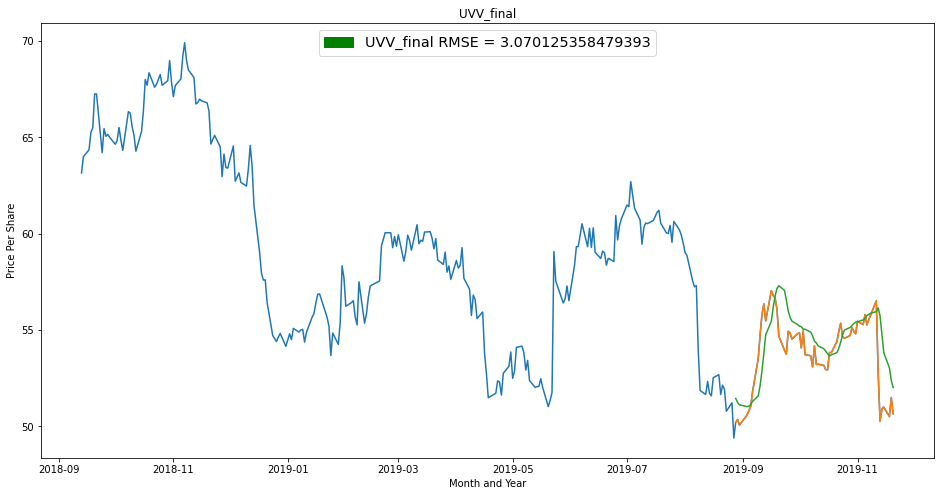

/content/drive/My Drive/CSC 180/Final Project/Stock Data/Final Dataset/UVV_final.csv


In [43]:
# for dataframe in dfs:
stock_ticker = 4

df = dfs[stock_ticker]
df.reset_index(inplace=True,drop=True)
df['time_x'] = pd.to_datetime(df.time_x,format='%Y-%m-%d')
df.index = df['time_x']

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(dfs[stock_ticker])),columns=['time_x', 'close_x'])
for i in range(0,len(data)):
    new_data['time_x'][i] = data['time_x'][i]
    new_data['close_x'][i] = data['close_x'][i]


#setting index
new_data.index = new_data.time_x
new_data.drop('time_x', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:240,:]
valid = dataset[240:,:]
#converting dataset into x_train and y_train

scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=4, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test.shape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing = model.predict(X_test)
closing_price = scaler.inverse_transform(closing)
closing_price_list.append(closing_price)

# Results
rms = np.sqrt(np.mean(np.power((valid-closing_price[0]),2)))
rms_list.append(rms)

# #   #for plotting
train = new_data[:240]
valid = new_data[240:]
valid['Predictions'] = closing_price
train_list.append(train)
valid_list.append(valid)
#for plotting
# https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html
label = filenames[stock_ticker][71:].rstrip('.csv')+ ' RMSE = ' +str(rms)

train = new_data[:240]
valid = new_data[240:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.title(filenames[stock_ticker][71:].rstrip('.csv'))
red_patch = mpatches.Patch(color='green', label=label)


plt.xlabel('Month and Year')
plt.ylabel('Price Per Share')
plt.legend(fontsize='x-large')

history = plt.plot(df['close_x'], label='Close Price history')
# plt.plot(train['close'])
guess = plt.plot(valid[['close_x','Predictions']])
plt.legend(handles=[red_patch], loc='upper center', fontsize='x-large')
plt.show()
print(filenames[stock_ticker])

In [ ]:
stock = 0
print(filenames[stock_ticker][71:].rstrip('.csv'))

In [ ]:
# # Cycling throught all remaining stocks
# # for stock in range(1, len(dfs)):

# while stock < 4:
#   df = dfs[stock]
#   df.reset_index(inplace=True,drop=True)
#   df['time_x'] = pd.to_datetime(df.time_x,format='%Y-%m-%d')
#   df.index = df['time_x']

#   #creating dataframe
#   data = df.sort_index(ascending=True, axis=0)
#   new_data = pd.DataFrame(index=range(0,len(APPL)),columns=['time_x', 'close_x'])
#   for i in range(0,len(data)):
#       new_data['time_x'][i] = data['time_x'][i]
#       new_data['close_x'][i] = data['close_x'][i]

#   #setting index
#   new_data.index = new_data.time_x
#   new_data.drop('time_x', axis=1, inplace=True)

#   #creating train and test sets
#   dataset = new_data.values

#   train = dataset[0:240,:]
#   valid = dataset[240:,:]
#   #converting dataset into x_train and y_train

#   scaled_data = scaler.fit_transform(dataset)

#   x_train, y_train = [], []
#   for i in range(60,len(train)):
#       x_train.append(scaled_data[i-60:i,0])
#       y_train.append(scaled_data[i,0])
#   x_train, y_train = np.array(x_train), np.array(y_train)

#   x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#   model1 = Sequential()
#   model_list.append(model1)
#   model_list[stock].add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#   model_list[stock].add(LSTM(units=50))
#   model_list[stock].add(Dense(1))
#   model_list[stock].compile(loss='mean_squared_error', optimizer='adam')
#   model_list[stock].fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
  

#   #predicting 246 values, using past 60 from the train data
#   inputs = new_data[len(new_data) - len(valid) - 60:].values
#   inputs = inputs.reshape(-1,1)
#   inputs  = scaler.transform(inputs)

#   X_test = []
#   for i in range(60,inputs.shape[0]):
#       X_test.append(inputs[i-60:i,0])
#   X_test = np.array(X_test)

#   X_test.shape
#   X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#   closing = model_list[stock].predict(X_test)
#   closing_price = scaler.inverse_transform(closing_price)

#   closing_price_list.append(closing_price)
  
#   # Results
#   rms = np.sqrt(np.mean(np.power((valid-closing_price),2)))
#   rms_list.append(rms)


#   # #   #for plotting
#   train = new_data[:240]
#   valid = new_data[240:]
#   valid['Predictions'] = closing_price
#   train_list.append(train)
#   valid_list.append(valid)

  
#   #for plotting
#   # https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html
#   label = filenames[stock].lstrip('/content/drive/My Drive/CSC 180/Final Project/Stock Data/Final Dataset/').rstrip('.csv')

#   train = new_data[:240]
#   valid = new_data[240:]
#   valid['Predictions'] = closing_price
#   plt.figure(figsize=(16,8))
#   plt.title(filenames[stock].lstrip('/content/drive/My Drive/CSC 180/Final Project/Stock Data/Final Dataset').rstrip('.csv'))
#   red_patch = mpatches.Patch(color='red', label=label)

#   plt.xlabel('Month and Year')
#   plt.ylabel('Price Per Share')
#   plt.legend(fontsize='x-large')

#   history = plt.plot(df['close_x'], label='Close Price history')
#   # plt.plot(train['close_x'])
#   guess = plt.plot(valid[['close_x','Predictions']])
#   plt.legend(handles=[red_patch], loc='upper center', fontsize='x-large')
#   plt.show()

#   model1 = None
#   del model1

#   stock += 1
#   %reset

In [ ]:
# i = 0
# while i < len(train_list):
#   rms_list[i]

#   # valid_list[i].Predictions = closing_price[i]
#   plt.figure(figsize=(16,8))
#   plt.title(filenames[i].lstrip('/content/drive/My Drive/CSC 180/Final Project/Stock Data/').rstrip('.csv'))
#   plt.plot(dfs[i].close_x, label='Close Price history')
#   plt.plot(train_list[i].close_x)
#   plt.plot([valid_list[i].close_x, valid_list[i].Predictions])

In [ ]:
valid_list